In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

In [25]:
data = pd.read_excel('IPG2211A2N.xls', skiprows=10)

In [26]:
data.head()

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [27]:
x = data.index
x

RangeIndex(start=0, stop=972, step=1)

In [28]:
data.index = pd.DatetimeIndex(data['observation_date'])

In [29]:
data.index = pd.to_datetime(data['observation_date'])

In [30]:
data.head()

,observation_date,IPG2211A2N
observation_date,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133


In [31]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='observation_date', length=972, freq=None)

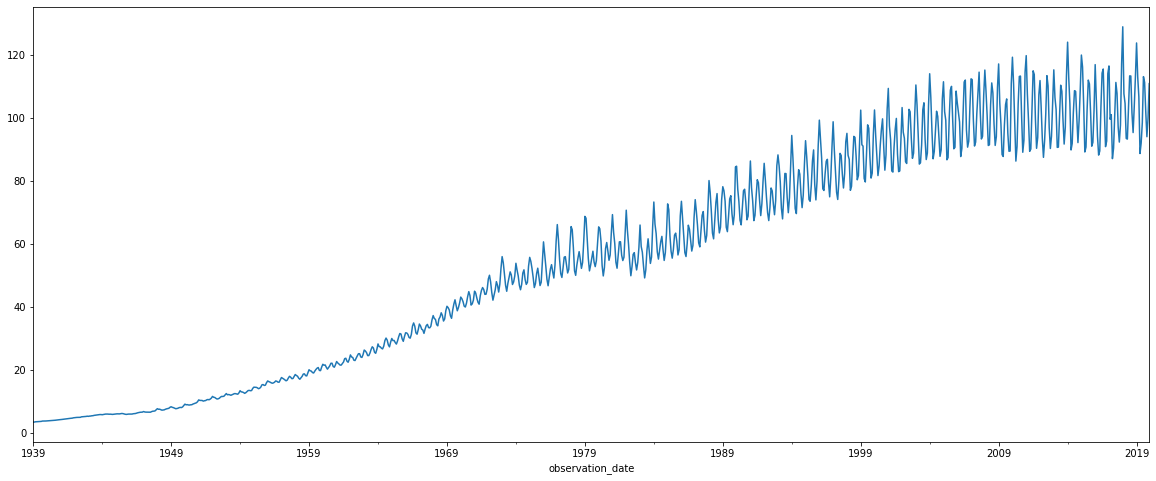

In [32]:
data['IPG2211A2N'].plot(figsize=(20,8))

## Риуем график средневзвешенных значений ##

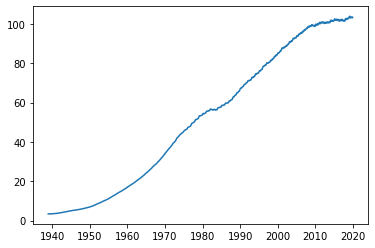

In [33]:
plt.plot(data['IPG2211A2N'].ewm(span=70, adjust=False).mean())

## Создаем и обучаем линейную регрессию ##

In [34]:
trend = LinearRegression()
trend.fit(pd.DataFrame(x), data['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

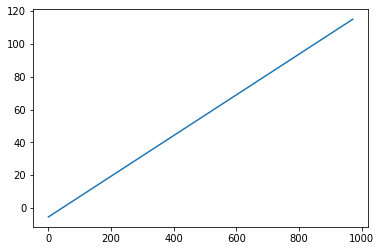

In [35]:
plt.plot(x, trend.predict(pd.DataFrame(x)))

## Рисуем график средних значений со скользящим окном 100 ##

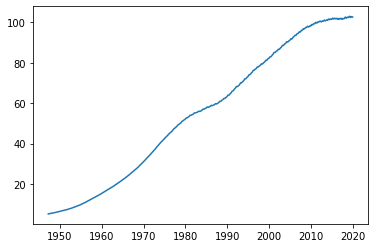

In [50]:
plt.plot(data['IPG2211A2N'].rolling(window=100).mean())

## Рисуем реальные данные и предсказанную линию регрессии ###

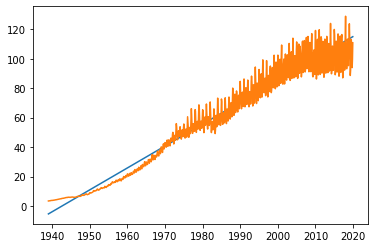

In [49]:
plt.plot(data.index, trend.predict(pd.DataFrame(range(len(data)))))
plt.plot(data['IPG2211A2N'])

In [39]:
data.tail(5)

,observation_date,IPG2211A2N
observation_date,,
2019-08-01,2019-08-01,111.2697
2019-09-01,2019-09-01,102.0033
2019-10-01,2019-10-01,93.9993
2019-11-01,2019-11-01,99.8843
2019-12-01,2019-12-01,110.8611


## Предсказание на 12 месяцев вперед ##

In [45]:
prediction = trend.predict(pd.DataFrame(range(len(data), len(data)+12)))

In [46]:
prediction

array([115.13417568, 115.25818845, 115.38220121, 115.50621397,
       115.63022673, 115.75423949, 115.87825226, 116.00226502,
       116.12627778, 116.25029054, 116.3743033 , 116.49831607])

In [47]:
pd.DataFrame(prediction)

,0
0,115.134176
1,115.258188
2,115.382201
3,115.506214
4,115.630227
5,115.754239
6,115.878252
7,116.002265
8,116.126278
9,116.250291


# Выводы
## Полученные данные позволяют оценить  растущий тренд, но учитывая линейность модели, не имеют достаточной точности. Модель не учитывает сезонные колебания данных. В данном случае лучше использовать другие, более точные и учитывающие сезонность модели. 